### Assignment 2
### CS/DATA 7200 - Machine Learning
### Instructor: Dr.Qing Tian
### Sumbitted By: Md Kamrul Islam

In [1]:
# some libraries that you may or may not use
# feel free to import other libraries if necessary
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
def RMSE(yHat, y):
    RMSE = mean_squared_error(yHat, y, squared = False)
    return RMSE

# TODO: calculate and return Root Mean Square Error (RMSE)
# Hint: you can either code yourself or use the mean_squared_error function from sklearn.metrics

In [4]:
# load the data (the UCI forestfires dataset)
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")
x = df.iloc[:, 0:12]
y = df.iloc[:, 12:13] # last column as the label column 
x.sample(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
154,1,5,sep,sat,93.4,145.4,721.4,8.1,29.6,27,2.7,0.0
117,3,4,mar,sat,91.7,35.8,80.8,7.8,15.2,27,4.9,0.0
390,7,4,feb,mon,84.7,9.5,58.3,4.1,7.5,71,6.3,0.0
473,9,4,jun,sat,90.5,61.1,252.6,9.4,24.5,50,3.1,0.0
127,3,5,sep,fri,93.5,149.3,728.6,8.1,17.2,43,3.1,0.0


In [5]:
# Let's see the y value as well
y.sample(5)

,area
139,0.43
124,0.00
416,7.02
221,35.88
455,0.00


In [6]:
# some preprocessing
# convert `month' and `day' to numerical values
le = preprocessing.LabelEncoder()
x["month"] = le.fit_transform(x["month"])
x["day"] = le.fit_transform(x["day"])

x.sample(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
253,7,4,1,4,91.9,109.2,565.5,8.0,21.4,38,2.7,0.0
107,4,5,1,3,90.2,99.6,631.2,6.3,21.4,33,3.1,0.0
312,2,4,11,3,50.4,46.2,706.6,0.4,12.2,78,6.3,0.0
252,6,5,1,6,93.1,157.3,666.7,13.5,22.1,37,3.6,0.0
491,4,4,1,4,95.8,152.0,624.1,13.8,32.4,21,4.5,0.0


In [7]:
# model construction, training, and evaluation
# split the data into training and test sets
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.33, random_state=42)

# TODO: 
# (1) build and train a linear model on the train set
# (2) calculate the RMSE error on the test set (use the function you defined earlier)


In [8]:
# Fitting the model
model = LinearRegression()
model.fit(xTrain, yTrain)

LinearRegression()

In [10]:
### Let's see some details of the model
## R-squared value
r_sq = model.score(xTrain, yTrain)
print('R squared:', r_sq )
### Intercept
print('Intercept:', model.intercept_)
### Slope of the variables
print('Estimate or co-efficent of variable:', model.coef_)

R squared: 0.04139599129038396
Intercept: [12.27240116]
Estimate or co-efficent of variable: [[ 2.30749309  0.08773786  0.0942854   0.97799506 -0.23069532  0.12763003
  -0.01175462  0.10865407  0.23425468 -0.2352624   0.65215652 -2.87409294]]


In [11]:
# Prediction on Test data
y_predicted = model.predict(xTest)
y_predicted

array([[ -4.02161578],
       [ 19.11997044],
       [ 30.81300277],
       [  4.74133326],
       [ 16.2424168 ],
       [  2.41149441],
       [  3.20196637],
       [  6.33301528],
       [  3.12807912],
       [ -1.43970289],
       [  8.33491971],
       [  8.82537029],
       [ 18.57459494],
       [  1.59907715],
       [ 11.17534079],
       [  1.23436606],
       [ -7.34432387],
       [ 12.76587003],
       [ 21.82354615],
       [  8.37889086],
       [  4.7173373 ],
       [ 21.0578918 ],
       [ 12.43865892],
       [ 15.73433296],
       [ -0.32363826],
       [ 31.7799353 ],
       [ 11.47245613],
       [ 37.84623098],
       [ 12.5143233 ],
       [  7.80579501],
       [ 12.19928544],
       [ 19.56563872],
       [  4.33606232],
       [ 12.84759975],
       [  9.8644378 ],
       [ 24.22274439],
       [ 10.74103752],
       [ 15.01004743],
       [ 18.08493706],
       [  1.42955123],
       [ 29.98621834],
       [  6.24114704],
       [ 11.62944222],
       [ 17

In [12]:
## Let's Find the rmse using the function above
print("RMSE :", RMSE(y_predicted, yTest))

RMSE : 88.27628521920255


In [13]:
## We can aslo find Root Mean Square error using mean_squared_error function from sklearn.metrics  and numpy sqrt function 
mse = mean_squared_error(yTest, y_predicted)
print("MSE: " , mse)
rmse = np.sqrt(mse)
print("RMSE : ", rmse)

MSE:  7792.702532101998
RMSE :  88.27628521920255


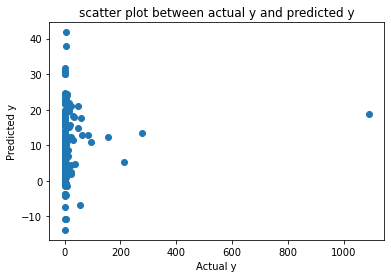

In [14]:
## Let's plot our actual value and predicted value of Y
import matplotlib.pyplot as plt
plt.scatter(yTest, y_predicted)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()

In [15]:
## Let's use SDGRegressor instead of using dircect linearregression
# Standardizationi of Data
scaler = preprocessing.StandardScaler().fit(xTrain)
x_Train = scaler.transform(xTrain)
x_Test=scaler.transform(xTest)

In [17]:
## Converting into array
x_test=np.array(x_Test)
y_test=np.array(yTest)

In [18]:
print(x_Train.shape)
print(x_test.shape)
print(yTrain.shape)
print(y_test.shape)

(346, 12)
(171, 12)
(346, 1)
(171, 1)


C:\Users\msi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


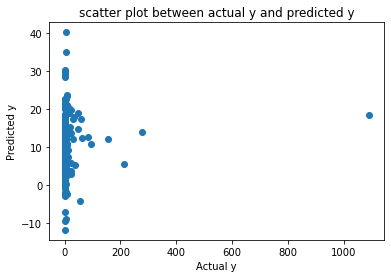

Mean Squared Error : 7781.215747704755
RMSE :  88.21119967274424


array([ 5.15909862,  0.10152857,  0.30936102,  1.8012108 , -1.21983045,
        7.5868421 , -2.47522031, -0.12997426,  1.36420385, -3.57142995,
        1.1532753 , -1.0512391 ])

In [23]:
## Buildind and fitting the model
sdg_model = SGDRegressor()
sdg_model.fit(x_Train, yTrain)
plt.scatter(y_test,sdg_model.predict(x_test))

plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, sdg_model.predict(x_test)))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, sdg_model.predict(x_test))))
sdg_model.coef_

In [ ]:
### Conclusion 
## We can see that our RMSE is higher, in both cases
## If we want to improve our model we can try for buidling SGD regression by self coding where we can change learning rate and iteration
## In self coding we can change our learning rate and iteration size and maybe can find our suitable model
## As it was not asked in the assignment, I did not do that.

## Thanks